# 计算距离矩阵

In [333]:
import matplotlib.pyplot as plt
import math
import numpy as np
def Distance(x1, y1, x2, y2):
    return math.sqrt(pow((x1- x2), 2) + pow((y1- y2), 2))
n = 6
x = []
y = []

dx = [-1, -1, 0, 1, 1, 1, 0, -1]  # 方向数组
dy = [0, -1, -1, -1, 0, 1, 1, 1]
node = [-1, -(n + 1), -n, -(n - 1), 1, n + 1, n, n - 1]
for i in range(n):
    for j in range(n):
        x.append(j + 0.5)
        y.append(i + 0.5)
x = np.array(x)
y = np.array(y)
num = len(x)
distance = np.zeros([num,num])

INF = 1000
for i in range(num):
    for j in range(num):
        distance[i, j] = INF
for i in range(len(x)):
    for j in range(8):
        new_x = x[i] + dx[j]
        new_y = y[i] + dy[j]
        if new_x > 0 and new_y > 0 and new_x < n and new_y < n:
            distance[i, i + node[j]] = Distance(x[i], y[i], new_x, new_y)

# 设置障碍

In [334]:
# remove_n = [14, 20, 11, 17, 23, 31, 32, 33, 21]
# remove_n = [4, 6, 7, 12, 14, 16, 17, 19]
# remove_n = np.random.randint(1, num, size = 16)
# remove_n = [25, 26, 27, 35, 41, 42, 43]
remove_n = [1, 2, 9, 14, 20, 23, 29, 35]
# remove_n = [2, 5, 16, 27, 38, 41, 53, 62]
# remove_n = [3, 9, 11, 13, 14, 21, 22, 25, 26, 27, 37, 38, 39, 41, 43, 49, 51,53, 54, 59]
# remove_n = [7, 8, 9, 11, 14, 15, 17, 19, 20, 21, 23, 31, 32, 33, 34]
# remove_n = [1, 2, 3, 4, 15, 20, 23, 24, 27, 32, 33, 34]
# remove_n = [4, 7, 8, 20, 19, 16, 22, 30, 31]
obstacle_x = []
obstacle_y = []
for i in range(len(remove_n)):
    obstacle_x.append(x[remove_n[i]])
    obstacle_y.append(y[remove_n[i]])
x = np.delete(x, remove_n)
y = np.delete(y, remove_n)
distance = np.delete(distance, remove_n, 0)
distance = np.delete(distance, remove_n, 1)
num = len(x)

In [338]:
x2 = x
y2 = y
obstacle_x2 = obstacle_x
obstacle_y2 = obstacle_y

In [36]:
with open("C:/Users/lenovo/Desktop/distance.txt", "w") as f:    #打开文件
    for i in range(distance.shape[0]):
        for j in range(distance.shape[1]):
            f.write(str(distance[i, j]))   #读取文件
            f.write(' ')
        f.write('\n')

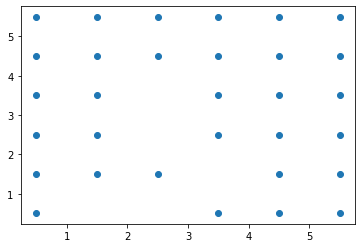

In [332]:
plt.scatter(x, y)

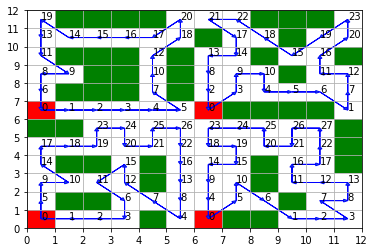

In [372]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

n = 12
num = len(road1)
xx = []
yy = []
for i in range(num):
    xx.append(x1[road1[i]])
    yy.append(y1[road1[i]])
ax=plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置
ax.fill_between(np.array([0, 1]),0,1,facecolor='red')
n_x1 = np.array(obstacle_x1) - 0.5
n_x2 = np.array(obstacle_x1) + 0.5
n_y1 = np.array(obstacle_y1) - 0.5
n_y2 = np.array(obstacle_y1) + 0.5
points = np.stack((x1, y1), axis=1)
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num - 1):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')

xx = []
yy = []
num = len(road2)
for i in range(num):
    xx.append(x2[road2[i]] + 6)
    yy.append(y2[road2[i]])

ax.fill_between(np.array([6, 7]),0,1,facecolor='red')
n_x1 = np.array(obstacle_x2) + 6 - 0.5
n_x2 = np.array(obstacle_x2) + 6 + 0.5
n_y1 = np.array(obstacle_y2) - 0.5
n_y2 = np.array(obstacle_y2) + 0.5
points = np.stack((x2 + 6, y2), axis=1)
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num - 1):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')

xx = []
yy = []
num = len(road3)
for i in range(num):
    xx.append(x3[road3[i]])
    yy.append(y3[road3[i]] + 6)

ax.fill_between(np.array([0, 1]),6,7,facecolor='red')
n_x1 = np.array(obstacle_x3) - 0.5
n_x2 = np.array(obstacle_x3) + 0.5
n_y1 = np.array(obstacle_y3) + 6 - 0.5
n_y2 = np.array(obstacle_y3) + 6 + 0.5
points = np.stack((x3, y3 + 6), axis=1)
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num - 1):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')

xx = []
yy = []
num = len(road4)
for i in range(num):
    xx.append(x4[road4[i]] + 6)
    yy.append(y4[road4[i]] + 6)

ax.fill_between(np.array([6, 7]),6,7,facecolor='red')
n_x1 = np.array(obstacle_x4) + 6 - 0.5
n_x2 = np.array(obstacle_x4 )+ 6 + 0.5
n_y1 = np.array(obstacle_y4) + 6 - 0.5
n_y2 = np.array(obstacle_y4) + 6 + 0.5
points = np.stack((x4 + 6, y4 + 6), axis=1)
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num - 1):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')

plt.xlim(0, n)
plt.ylim(0, n)

ax.xaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.yaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.xaxis.grid(True,which='major')#major,color='black'
ax.yaxis.grid(True,which='major')#major,color='black'
plt.show()

# 弓字形遍历

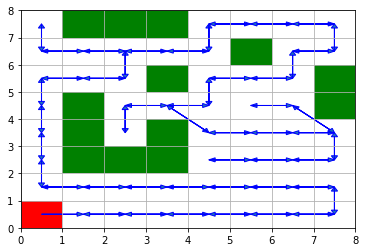

In [343]:
class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        m = len(grid)
        n = len(grid[0])
        road = []
        mark = [[0] * n for i in range(m)]
        for i in range(m):
            for j in range(n):
                if mark[i][j] == 0 and grid[i][j] == 0:
                    self.dfs(mark, grid, road, i, j)
        return road

    # 深度优先搜索:时间优于宽度优先搜索
    def dfs(self, mark, grid, road, x, y):
        mark[x][y] = 1
#         road.append([x, y])
        dx = [-1, 1, 0, 0, -1, -1, 1, 1]  # 方向数组
        dy = [0, 0, 1, -1, 1, -1, -1, 1]
        m = len(grid)
        n = len(grid[0])
        p = 0
        # 遍历上下左右四个方向
        for i in range(8):
            newx = dx[i] + x
            newy = dy[i] + y
            if newx < 0 or newx >= m or newy >= n or newy < 0:
                continue
            if mark[newx][newy] == 0 and grid[newx][newy] == 0:
                road.append([x, y])
                self.dfs(mark, grid, road, newx, newy)
#                 p += 1
#                 if p > 2:
#                     road.append([x, y])
#                 if [newx, newy] not in road:
                road.append([newx, newy])

n = 8
s = Solution()
# nums = xy
flag = np.zeros([n, n])
a = np.random.randint(1,n,size=15)
b = np.random.randint(1,n,size=15)
# a = [1, 1, 2, 3, 3, 3, 3, 2]
# b = [3, 5, 3, 3, 4, 5, 5, 5]
flag[a, b] = 1
road = np.array(s.numIslands(flag))
X = []
Y = []
for i in range(len(road)):
    X.append(road[i, 0] + 0.5)
    Y.append(road[i, 1] + 0.5)
num = len(X)
ax=plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置
ax.fill_between(np.array([0, 1]),0,1,facecolor='red')
n_x1 = np.array(a)
n_x2 = np.array(a) + 1
n_y1 = np.array(b)
n_y2 = np.array(b) + 1
# for i, p in enumerate(road):
#         plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num - 1):
    ax.arrow(X[i], Y[i], X[i + 1] - X[i], Y[i + 1] - Y[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')
plt.xlim(0, n)
plt.ylim(0, n)

ax.xaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.yaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.xaxis.grid(True,which='major')#major,color='black'
ax.yaxis.grid(True,which='major')#major,color='black'
plt.show()

In [356]:
road

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [7, 1],
       [6, 1],
       [5, 1],
       [4, 1],
       [3, 1],
       [2, 1],
       [1, 1],
       [0, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [7, 3],
       [6, 3],
       [5, 3],
       [4, 3],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [7, 5],
       [6, 5],
       [5, 5],
       [4, 5],
       [4, 6],
       [5, 6],
       [6, 6],
       [7, 6],
       [7, 7],
       [6, 7],
       [5, 7],
       [4, 7],
       [3, 7],
       [2, 7],
       [1, 7],
       [0, 7],
       [0, 6],
       [1, 6],
       [1, 5],
       [0, 5],
       [0, 4],
       [1, 4],
       [2, 4],
       [2, 5],
       [2, 4],
       [1, 3],
       [0, 3],
       [1, 3]])

# A*

In [367]:
# 版本1.3，2018—04—11
# 所有节点的g值并没有初始化为无穷大
# 当两个子节点的f值一样时，程序选择最先搜索到的一个作为父节点加入closed
# 对相同数值的不同对待，导致不同版本的A*算法找到等长的不同路径
# 最后closed表中的节点很多，如何找出最优的一条路径
# 撞墙之后产生较多的节点会加入closed表，此时开始删除closed表中不合理的节点，1.1版本的思路
# 1.2版本思路，建立每一个节点的方向指针，指向f值最小的上个节点
# 参考《无人驾驶概论》、《基于A*算法的移动机器人路径规划》王淼驰，《人工智能及应用》鲁斌


import numpy
from pylab import *
import copy

# 定义一个含有障碍物的20×20的栅格地图
# 10表示可通行点
# 0表示障碍物
# 7表示起点
# 5表示终点
map_grid = numpy.full((20, 20), int(10), dtype=numpy.int8)
map_grid[3, 3:8] = 0
map_grid[3:10, 7] = 0
map_grid[10, 3:8] = 0
map_grid[17, 13:17] = 0
map_grid[10:17, 13] = 0
map_grid[10, 13:17] = 0
map_grid[5, 2] = 7
map_grid[15, 15] = 5


class AStar(object):
    """
    创建一个A*算法类
    """

    def __init__(self):
        """
        初始化
        """
        # self.g = 0  # g初始化为0
        self.start = numpy.array([5, 2])  # 起点坐标
        self.goal = numpy.array([15, 15])  # 终点坐标
        self.open = numpy.array([[], [], [], [], [], []])  # 先创建一个空的open表, 记录坐标，方向，g值，f值
        self.closed = numpy.array([[], [], [], [], [], []])  # 先创建一个空的closed表
        self.best_path_array = numpy.array([[], []])  # 回溯路径表

    def h_value_tem(self, son_p):
        """
        计算拓展节点和终点的h值
        :param son_p:子搜索节点坐标
        :return:
        """
        h = (son_p[0] - self.goal[0]) ** 2 + (son_p[1] - self.goal[1]) ** 2
        h = numpy.sqrt(h)  # 计算h
        return h

    # def g_value_tem(self, son_p, father_p):
    #     """
    #     计算拓展节点和父节点的g值
    #     其实也可以直接用1或者1.414代替
    #     :param son_p:子节点坐标
    #     :param father_p:父节点坐标，也就是self.current_point
    #     :return:返回子节点到父节点的g值，但不是全局g值
    #     """
    #     g1 = father_p[0] - son_p[0]
    #     g2 = father_p[1] - son_p[1]
    #     g = g1 ** 2 + g2 ** 2
    #     g = numpy.sqrt(g)
    #     return g

    def g_accumulation(self, son_point, father_point):
        """
        累计的g值
        :return:
        """
        g1 = father_point[0] - son_point[0]
        g2 = father_point[1] - son_point[1]
        g = g1 ** 2 + g2 ** 2
        g = numpy.sqrt(g) + father_point[4]  # 加上累计的g值
        return g

    def f_value_tem(self, son_p, father_p):
        """
        求出的是临时g值和h值加上累计g值得到全局f值
        :param father_p: 父节点坐标
        :param son_p: 子节点坐标
        :return:f
        """
        f = self.g_accumulation(son_p, father_p) + self.h_value_tem(son_p)
        return f

    def child_point(self, x):
        """
        拓展的子节点坐标
        :param x: 父节点坐标
        :return: 子节点存入open表，返回值是每一次拓展出的子节点数目，用于撞墙判断
        当搜索的节点撞墙后，如果不加处理，会陷入死循环
        """
        # 开始遍历周围8个节点
        for j in range(-1, 2, 1):
            for q in range(-1, 2, 1):

                if j == 0 and q == 0:  # 搜索到父节点去掉
                    continue
                m = [x[0] + j, x[1] + q]
#                 print(m)
                if m[0] < 0 or m[0] > 19 or m[1] < 0 or m[1] > 19:  # 搜索点出了边界去掉
                    continue

                if map_grid[int(m[0]), int(m[1])] == 0:  # 搜索到障碍物去掉
                    continue



                record_g = self.g_accumulation(m, x)
                record_f = self.f_value_tem(m, x)  # 计算每一个节点的f值

                x_direction, y_direction = self.direction(x, m)  # 每产生一个子节点，记录一次方向

                para = [m[0], m[1], x_direction, y_direction, record_g, record_f]  # 将参数汇总一下
#                 print(para)

                # 在open表中，则去掉搜索点，但是需要更新方向指针和self.g值
                # 而且只需要计算并更新self.g即可，此时建立一个比较g值的函数
                a, index = self.judge_location(m, self.open)
                if a == 1:
                    # 说明open中已经存在这个点

                    if record_f <= self.open[5][index]:
                        self.open[5][index] = record_f
                        self.open[4][index] = record_g
                        self.open[3][index] = y_direction
                        self.open[2][index] = x_direction

                    continue

                # 在closed表中,则去掉搜索点
                b, index2 = self.judge_location(m, self.closed)
                if b == 1:

                    if record_f <= self.closed[5][index2]:
                        self.closed[5][index2] = record_f
                        self.closed[4][index2] = record_g
                        self.closed[3][index2] = y_direction
                        self.closed[2][index2] = x_direction
                        self.closed = numpy.delete(self.closed, index2, axis=1)
                        self.open = numpy.c_[self.open, para]
                    continue

                self.open = numpy.c_[self.open, para]  # 参数添加到open中
#                 print(self.open)

    def judge_location(self, m, list_co):
        """
        判断拓展点是否在open表或者closed表中
        :return:返回判断是否存在，和如果存在，那么存在的位置索引
        """
        jud = 0
        index = 0
        for i in range(list_co.shape[1]):

            if m[0] == list_co[0, i] and m[1] == list_co[1, i]:

                jud = jud + 1

                index = i
                break
            else:
                jud = jud
        # if a != 0:
        #     continue
        return jud, index

    def direction(self, father_point, son_point):
        """
        建立每一个节点的方向，便于在closed表中选出最佳路径
        非常重要的一步，不然画出的图像参考1.1版本
        x记录子节点和父节点的x轴变化
        y记录子节点和父节点的y轴变化
        如（0，1）表示子节点在父节点的方向上变化0和1
        :return:
        """
        x = son_point[0] - father_point[0]
        y = son_point[1] - father_point[1]
        return x, y

    def path_backtrace(self):
        """
        回溯closed表中的最短路径
        :return:
        """
        best_path = [15, 15]  # 回溯路径的初始化
        self.best_path_array = numpy.array([[15], [15]])
        j = 0
        while j <= self.closed.shape[1]:
            for i in range(self.closed.shape[1]):
                if best_path[0] == self.closed[0][i] and best_path[1] == self.closed[1][i]:
                    x = self.closed[0][i]-self.closed[2][i]
                    y = self.closed[1][i]-self.closed[3][i]
                    best_path = [x, y]
                    self.best_path_array = numpy.c_[self.best_path_array, best_path]
                    break  # 如果已经找到，退出本轮循环，减少耗时
                else:
                    continue
            j = j+1
#         return self.best_path_array

    def main(self):
        """
        main函数
        :return:
        """
        best = self.start  # 起点放入当前点，作为父节点
        h0 = self.h_value_tem(best)
        init_open = [best[0], best[1], 0, 0, 0, h0]  # 将方向初始化为（0，0），g_init=0,f值初始化h0
        self.open = numpy.column_stack((self.open, init_open))  # 起点放入open,open初始化

        ite = 1  # 设置迭代次数小于200，防止程序出错无限循环
        while ite <= 1000:

                # open列表为空，退出
                if self.open.shape[1] == 0:
                    print('没有搜索到路径！')
                    return

                self.open = self.open.T[numpy.lexsort(self.open)].T  # open表中最后一行排序(联合排序）

                # 选取open表中最小f值的节点作为best，放入closed表

                best = self.open[:, 0]
#                 print('检验第%s次当前点坐标*******************' % ite)
#                 print(best)
                self.closed = numpy.c_[self.closed, best]

                if best[0] == 15 and best[1] == 15:  # 如果best是目标点，退出
                    print('搜索成功！')
                    return

                self.child_point(best)  # 生成子节点并判断数目
#                 print(self.open)
                self.open = numpy.delete(self.open, 0, axis=1)  # 删除open中最优点

                # print(self.open)

                ite = ite+1



def draw_direction_point(a):
    """
    从终点开始，根据记录的方向信息，画出搜索的路径图
    :return:
    """
    print('打印direction长度：')
    print(a.best_path_array.shape[1])
    map_direction = copy.deepcopy(map_grid)
    for i in range(a.best_path_array.shape[1]):
        x = a.best_path_array[:, i]

        map_direction[int(x[0]), int(x[1])] = 6

    plt.imshow(map_direction, cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=10)
    # plt.colorbar()
    xlim(-1, 20)  # 设置x轴范围
    ylim(-1, 20)  # 设置y轴范围
    my_x_ticks = numpy.arange(0, 20, 1)
    my_y_ticks = numpy.arange(0, 20, 1)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.grid(True)
    plt.show()


if __name__ == '__main__':

    a1 = AStar()
    a1.main()
    a1.path_backtrace()
    path = []
    for i in range(a1.best_path_array.shape[1]):
        path.append(a1.best_path_array[:, i])
#     draw_direction_point(a1)

搜索成功！


In [371]:
path[0][0]

15.0

In [ ]:
class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        n = grid.shape[0]
        road = []
        mark = [[0] * n for i in range(n)]
        dx = [-1, 1, 0, 0, -1, -1, 1, 1]  # 方向数组
        dy = [0, 0, 1, -1, 1, -1, -1, 1]
        road.append([0, 0])
        mark[0][0] = 1
        for i in range(n):
            if i % 2 == 0:
                for j in range(n):
                    if mark[i][j] == 0 and grid[i][j] == 0:
                        # 遍历8个方向
                        for k in range(8):
                            newx = dx[k] + j
                            newy = dy[k] + i
                            if newx < 0 or newx >= m or newy >= n or newy < 0:
                                continue
                            if mark[newx][newy] == 0 and grid[newx][newy] == 0:
                                road.append([j, i])
                                mark[newx][newx] = 1
                                break
            else:
                for j in range(n - 1, -1, -1):
                    if mark[i][j] == 0 and grid[i][j] == 0:
                        # 遍历8个方向
                        for k in range(8):
                            newx = dx[k] + j
                            newy = dy[k] + i
                            if newx < 0 or newx >= m or newy >= n or newy < 0:
                                continue
                            if mark[newx][newy] == 0 and grid[newx][newy] == 0:
                                road.append([j, i])
                                mark[newx][newx] = 1
                                break
        return road

n = 8
s = Solution()
# nums = xy
flag = np.zeros([n, n])
a = np.random.randint(1,n,size=15)
b = np.random.randint(1,n,size=15)
# a = [1, 1, 2, 3, 3, 3, 3, 2]
# b = [3, 5, 3, 3, 4, 5, 5, 5]
flag[a, b] = 1
road = np.array(s.numIslands(flag))
X = []
Y = []
for i in range(len(road)):
    X.append(road[i, 0] + 0.5)
    Y.append(road[i, 1] + 0.5)

# 动态规划

In [45]:
import datetime
start = datetime.datetime.now()
num = len(x)
b = (int)(pow(2,num-1))
F = np.zeros([num,b]) #n行b列的二维数组，存放阶段最优值
M = np.zeros([num,b], dtype = 'int') #n行b列的二维数组，存放最优策略

#初始化F[][]和M[][]
for i in range(b):
    for j in range(num):
        F[j][i] = -1
        M[j][i] = -1

#给F的第0列赋初值
for i in range(num):
    F[i, 0] = distance[i, 0]

#遍历并填表
for i in range(1, b - 1): #最后一列不在循环里计算
    for j in range(1, num):
        if ((int)(pow(2,j-1)) & i) == 0: #结点j不在i表示的集合中
            Min=65535.0
            for k in range(1, num):
                if (int)(pow(2,k-1)) & i: #非零表示结点k在集合中
                    temp = distance[j, k] + F[k, i-(int)(pow(2,k-1))]
                    if temp < Min:
                        Min = temp
                        F[j, i] = Min #保存阶段最优值
                        M[j, i] = k #保存最优决策


#最后一列，即总最优值的计算
Min=65535.0
for k in range(1, num):
    #b-1的二进制全1，表示集合{1,2,3,4,5}，从中去掉k结点即将k对应的二进制位置0
    temp = distance[0, k] + F[k, b-1 - (int)(pow(2,k-1))]
    if temp < Min:
        Min = temp
        F[0, b-1] = Min #总最优解
        M[0, b-1] = k

print("最短路径长度：", F[0, b-1]) #最短路径长度


#回溯查表M输出最短路径(编号0~n-1)
print("最短路径(编号0—n-1)：0")
i = b - 1
j = 0
road = []
road.append(0)
while i > 0: #i的二进制是5个1，表示集合{1,2,3,4,5}
    j = M[j, i] #下一步去往哪个结点
    road.append(j)
    i = i - (int)(pow(2,j-1)) #从i中去掉j结点
    print("->", j)
print("->0")
road.append(0)
end = datetime.datetime.now()
print(end-start)

KeyboardInterrupt: 

# 遗传算法

2020.2426406871193
[6, 8, 9, 11, 13, 19, 7, 10, 12, 18, 20, 17, 16, 15, 14, 5, 4, 3, 2, 1]


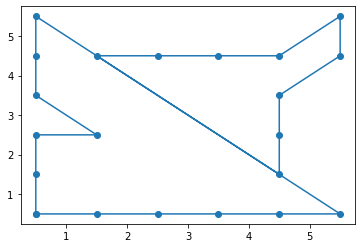

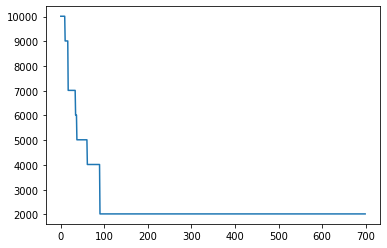

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
matplotlib.rcParams['font.family']= 'STSong'

num = len(x)
 
#种群数
count=500
#改良次数
improve_count=1000
#进化次数
itter_time=700

#设置强者的定义概率，即种群前30%为强者
retain_rate=0.3
 
#设置弱者的存活概率
random_select_rate=0.5
 
#变异率
mutation_rate=0.1
 
#设置起点和终点
start = 0
end = 0
index=[i for i in range(num)]
index.remove(start)

 

# def get_path(x):
#     graded = [[x[i], index[i]] for i in range(len(x))]
#     graded_index = [t[1] for t in sorted(graded)]
#     return graded_index
#总距离
def get_total_distance(x):
    Distance=0
    Distance+=distance[start][x[0]]
    for i in range(len(x)):
        if i==len(x)-1:
            Distance += distance[end][x[i]]
        else:
            Distance += distance[x[i]][x[i+1]]
    return Distance
 
#改良
def improve(x):
    i=0
    Distance=get_total_distance(x)
    while i<improve_count:
        # randint [a,b]
        u=random.randint(0,len(x)-1)
        v = random.randint(0, len(x)-1)
        if u!=v:
            new_x=x.copy()
            t=new_x[u]
            new_x[u]=new_x[v]
            new_x[v]=t
            new_distance=get_total_distance(new_x)
            if new_distance<Distance:
                Distance=new_distance
                x=new_x.copy()
        else:
            continue
        i+=1

#自然选择
def selection(population):
    """
    选择
    先对适应度从大到小排序，选出存活的染色体
    再进行随机选择，选出适应度虽然小，但是幸存下来的个体
    """
    # 对总距离从小到大进行排序
    graded = [[get_total_distance(p), p] for p in population]
    graded = [p[1] for p in sorted(graded)]
    # 选出适应性强的染色体
    retain_length = int(len(graded) * retain_rate)
    parents = graded[:retain_length]
    # 选出适应性不强，但是幸存的染色体
    for chromosome in graded[retain_length:]:
        if random.random() < random_select_rate:
            parents.append(chromosome)
    return parents
 
#交叉繁殖
def crossover(parents):
    #生成子代的个数,以此保证种群稳定
    target_count=count-len(parents)
    #孩子列表
    children=[]
    while len(children)<target_count:
        male_index = random.randint(0, len(parents) - 1)
        female_index = random.randint(0, len(parents) - 1)
        if male_index!=female_index:
            male=parents[male_index]
            female=parents[female_index]
 
            left=random.randint(0,len(male)-2)
            right=random.randint(left+1,len(male)-1)
 
            #交叉片段
            gene1=male[left:right]
            gene2=female[left:right]
 
            child1_c=male[right:]+male[:right]
            child2_c=female[right:]+female[:right]
            child1=child1_c.copy()
            child2= child2_c.copy()
 
            for o in gene2:
                child1_c.remove(o)
 
            for o in gene1:
                child2_c.remove(o)
 
            child1[left:right]=gene2
            child2[left:right]=gene1
 
            child1[right:]=child1_c[0:len(child1)-right]
            child1[:left] = child1_c[len(child1) - right:]
 
            child2[right:] = child2_c[0:len(child1) - right]
            child2[:left] = child2_c[len(child1) - right:]
 
            children.append(child1)
            children.append(child2)
 
    return children
 
#变异
def mutation(children):
    for i in range(len(children)):
        if random.random() < mutation_rate:
            child=children[i]
            u=random.randint(1,len(child)-4)
            v = random.randint(u+1, len(child)-3)
            w= random.randint(v+1, len(child)-2)
            child=children[i]
            child=child[0:u]+child[v:w]+child[u:v]+child[w:]

#得到最佳纯输出结果
def get_result(population):
    graded = [[get_total_distance(p), p] for p in population]
    graded = sorted(graded)
    return graded[0][0],graded[0][1]
 
#使用改良圈算法初始化种群
population=[]
for i in range(count):
    #随机生成个体
    c=index.copy()
    random.shuffle(c)
    improve(c)
    population.append(c)

register=[]
i=0
Distance, result_path = get_result(population)
while i<itter_time:
    #选择繁殖个体群
    parents=selection(population)
    #交叉繁殖
    children=crossover(parents)
    #变异操作
    mutation(children)
    #更新种群
    population=parents+children
 
    Distance,result_path=get_result(population)
    register.append(Distance)
    i=i+1

print(Distance)
print(result_path)
 
result_path=[start]+result_path+[end]
X=[]
Y=[]
for index in result_path:
    X.append(x[index])
    Y.append(y[index])

plt.plot(X,Y,'-o')
plt.show()
 
plt.plot(list(range(len(register))),register)
plt.show()

In [151]:
# road = result_path
road = opt_chr

# 蚁群算法

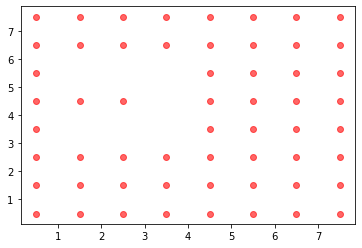

The shortest distance is 1056.8284271247462m and the best path is:  city_0 -> city_1 -> city_2 -> city_3 -> city_11 -> city_12 -> city_4 -> city_5 -> city_13 -> city_21 -> city_26 -> city_27 -> city_22 -> city_14 -> city_6 -> city_7 -> city_15 -> city_23 -> city_28 -> city_35 -> city_40 -> city_48 -> city_56 -> city_55 -> city_47 -> city_39 -> city_34 -> city_33 -> city_38 -> city_37 -> city_45 -> city_46 -> city_54 -> city_53 -> city_52 -> city_44 -> city_43 -> city_51 -> city_50 -> city_49 -> city_41 -> city_42 -> city_36 -> city_29 -> city_30 -> city_31 -> city_32 -> city_25 -> city_20 -> city_19 -> city_18 -> city_10 -> city_9 -> city_17 -> city_24 -> city_16 -> city_8 ->city_0.



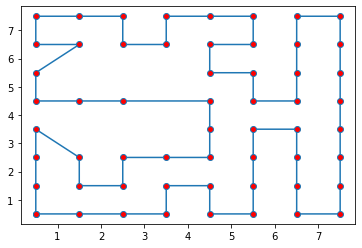

In [418]:
def creat_city():
    """
    input:
        num: 城市数量
        scale: 城市坐标范围x,y in (0, scale)
    return:
        V：城市的坐标集合
        E：城市的邻接矩阵
    """


    V = np.stack((x,y), axis=1)

#     inner = -2 *  V.dot(V.T)
#     xx = np.sum(V**2, axis=1, keepdims=True)
#     E = xx + inner + xx.T
#     E = E**0.5
    index = [i for i in range(num)]
    E = distance
    #为了防止蚂蚁出现自旋，邻接矩阵上的对角线取值尽量大一点。
    E[index,index] = 9999999
    return V,E
V, E = creat_city()
plt.scatter(V[:,0], V[:,1], alpha=0.6, c = "r")  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.show()
import heapq
import random

def a_res(samples, m):
    """
    :samples: [(item, weight), ...]
    :k: number of selected items
    :returns: [(item, weight), ...]
    """

    heap = [] # [(new_weight, item), ...]
    for sample in samples:
        wi = sample[1]
        if wi==0:
            continue
        ui = random.uniform(0, 1)
        ki = ui ** (1/wi)

        if len(heap) < m:
            heapq.heappush(heap, (ki, sample))
        elif ki > heap[0][0]:
            heapq.heappush(heap, (ki, sample))

            if len(heap) > m:
                heapq.heappop(heap)

    return [item[1] for item in heap]
def possibility(eta, gamma, other_city, cur_city):
    """
    返回候选城市集合中，从start到各候选城市的概率，只返回有路径的
    """   
    alpha = 1
    beta = 5
    start_city = cur_city[-1]

    t_i = gamma[start_city]  
    n_i = eta[start_city]
    
    temp = (t_i**alpha * n_i**beta)
    temp[cur_city] = 0
    add = temp.sum()
    p_ij = temp/add
    
    return p_ij
def rotate(l, n):
    '''
    旋转列表。
    '''
    return l[n:] + l[:n]

def get_path_dis(root, E):
    """
    获取该路径距离。
    """
    dis = E[root[:-1], root[1:]].sum()
    return dis + E[root[0],root[-1]]

def MMAS(V, E, M, num, islocal=True):
    """
    最大最小蚁群算法
    V : 点集
    E: 邻接矩阵，点之间的连接性，
    M: 蚂蚁数量
    num：迭代次数
    """
    #相关参数
    global_best_path=None   #当前最优路径
    global_best_dis = 99999999
    cur_city = None
    other_city = [i for i in range(len(V))]
    lo = 0.8   #信息素挥发率
    e = num #精英路径权重
    
    tao_min = 0.1 / num
    tao_max = 1

    #信息素启发值
    eta = 1/E
    eta[np.isinf(eta)] = 0
    
    #信息素浓度
    E_mean = E[E>0].mean()
    gamma = np.full(E.shape,tao_max) 
    
    V_index = [i for i in range(len(V))]

    for i in range(num):
        epoch_gamma = np.zeros_like(gamma) #保存每一轮的各路径信息素累积量
        local_best_path=None   #每一次迭代当前最优路径
        local_best_dis = 99999999
        for j in range(M):
            cur_city = [j%len(V)]
            other_city = [i for i in range(len(V))]
            other_city.remove(cur_city[-1])
            while(other_city):
                p_ij = possibility(eta, gamma, other_city, cur_city)
                next_city = int(a_res(np.stack((V_index,p_ij),axis=1), 1)[0][0])
                if next_city not in other_city:
                    next_city = int(a_res(np.stack((V_index,p_ij),axis=1), 1)[0][0])
                
                epoch_gamma[cur_city[-1],next_city] += gamma[cur_city[-1],next_city]
                cur_city.append(next_city)
                other_city.remove(next_city)
            epoch_dis = get_path_dis(cur_city, E)
            if epoch_dis < local_best_dis:
                local_best_dis = epoch_dis
                local_best_path = cur_city

        if local_best_dis < global_best_dis:
            global_best_dis = local_best_dis
            global_best_path = local_best_path
         #信息素更新   
        gamma = (1 - lo) * gamma
        if islocal:
            for i,j in np.stack((local_best_path[1:] + local_best_path[:1], local_best_path), axis=1):
                gamma[i,j] += e / local_best_dis
        else:
            for i,j in np.stack((global_best_path[1:] + global_best_path[:1], global_best_path), axis=1):
                gamma[i,j] += e / global_best_dis
        gamma[gamma>tao_max] = tao_max
        gamma[gamma<tao_min] = tao_min
    
    print("The shortest distance is {}m and the best path is: ".format(global_best_dis), end="")
    best_path = rotate(global_best_path, global_best_path.index(0))
    for index in best_path:
        print(" city_" + str(index) + " ->", end="")
    print("city_0.\n")
    
    return best_path
root = MMAS(V, E, 50, 100)
path = V[root]
path = np.append(path, [path[0]], axis=0)
plt.plot(path[:,0], path[:,1], marker="o", mfc="r")
plt.show()

In [419]:
road = np.hstack((root, 0))

# 模拟退火

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


程序的运行时间是：3.5285664729890414
最短路径：29.65685424949238
0-->5-->10-->6-->1-->2-->3-->7-->8-->13-->12-->11-->16-->17-->22-->27-->26-->21-->20-->25-->24-->23-->18-->19-->15-->14-->9-->4-->0


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


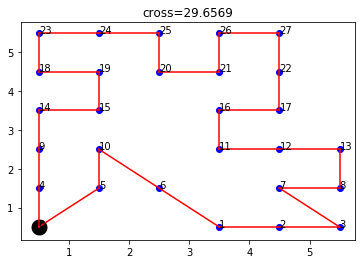

In [336]:
import time
import numpy as np
import matplotlib.pyplot as plt 
import pdb
import imageio
import shutil
import os

def init():
    alpha = 0.9
    t = (1,100)
    TIME = 1000
    way = np.arange(N)
    waydis = calWayDis(way)
    return alpha,t,TIME,way,waydis

# 计算路径长度
def calWayDis(way0):
    waydis = 0
    for i in range(N-1):
        waydis +=dismat[way0[i]][way0[i+1]] 
    waydis += dismat[way0[N-1]][way0[0]]
    return waydis

def draw(way,dist):
    global N,points ,TIMESIT, PNGFILE, PNGLIST
    plt.cla()
    plt.title('cross=%.4f' % dist)
    xs = [points[i][0] for i in range(N)]
    ys = [points[i][1] for i in range(N)]
    plt.scatter(xs, ys, color='b')
    xs = np.array(xs)
    ys = np.array(ys)
    # plt.plot(xs[[0, solutionpath[0]]], ys[[0, solutionpath[0]]], color='r')
    # 连接路径
    for i in range(N-1):
        plt.plot(xs[[way[i], way[i + 1]]], ys[[way[i], way[i + 1]]], color='r')
    # 将终点与起点连接
    plt.plot(xs[[way[N - 1], 0]], ys[[way[N - 1], 0]], color='r')
    plt.scatter(xs[0], ys[0], color='k', linewidth=10)
    for i, p in enumerate(points):
        plt.text(*p, '%d' % i)

points = np.stack((x,y), axis=1)
N = points.shape[0]
dismat = distance
alpha,t,TIME,way,waydis=init()
t0 = t[1]
K=0.8


# 记录每次迭代的结果
result = []
tempway = way.copy()
bestway = way.copy()
bestdis = 10000
start = time.clock()
while t0>t[0]:
    for i in range(TIME):
        if np.random.rand() > 0.5:
        # 两点交换
            while True:
            # 随机生成不同2个点，
                city1 = np.int(np.ceil(np.random.rand()*(N-1)))
                city2 = np.int(np.ceil(np.random.rand()*(N-1)))
                if city1!=city2:
                    break
            # 交换
            tempway[city1],tempway[city2]=tempway[city2],tempway[city1]
        else:
            # 3个点
            while True:
                city1 = np.int(np.ceil(np.random.rand()*(N-1)))
                city2 = np.int(np.ceil(np.random.rand()*(N-1))) 
                city3 = np.int(np.ceil(np.random.rand()*(N-1)))
                if((city1 != city2)&(city2 != city3)&(city1 != city3)):
                    break
            # 下面的三个判断语句使得city1<city2<city3
            if city1 > city2:
                city1,city2 = city2,city1
            if city2 > city3:
                city2,city3 = city3,city2
            if city1 > city2:
                city1,city2 = city2,city1
            #下面的三行代码将[city1,city2)区间的数据插入到city3之后
            temp = tempway[city1:city2].copy()
            tempway[city1:city3-city2+1+city1] = tempway[city2:city3+1].copy()
            tempway[city3-city2+1+city1:city3+1] = temp.copy()

        tempdis = calWayDis(tempway)
        if tempdis<waydis:
            way = tempway.copy()
            waydis = tempdis
        if tempdis<bestdis:
            bestway = tempway.copy()
            bestdis = tempdis
            draw(bestway,bestdis)
        else:
            if np.random.rand()<np.exp(-(tempdis-waydis)/(t0)):
                way = tempway.copy()
                waydis = tempdis
                # 更新路径
            else: tempway = way.copy()

    t0 *= alpha
    result.append(bestdis)
end = time.clock()
print("程序的运行时间是：%s"%(end-start))
print("最短路径：%s"%np.array(result[-1]))
for i in bestway:
    print(i,end="-->")
print(bestway[0])

In [337]:
road2 = np.hstack((bestway, 0))

In [268]:
road4 = np.hstack((bestway, 0))

In [264]:
road3 = np.hstack((bestway, 0))

In [335]:
road1 = np.hstack((bestway, 0))

# 分支限界

In [254]:
"""
分支限界法
name:JCH
date:6.8
"""
import pandas as pd
import numpy as np
import math
from queue import Queue
import time

v = V
dist = distance
INF = 10000000
n = num
class Node:
    def __init__(self):
        self.visited=[False]*n
        self.s=0
        self.e=0
        self.k=1
        self.sumv=0
        self.lb=0
        self.listc=[]
 
 
pq = Queue() #创建一个优先队列
low=0 #下界
up=0#上界（使用贪心算法得出）
dfs_visited=[False]*n
dfs_visited[0]=True
def dfs(u,k,l):
    if k==n-1 :
        return (l+dist[u][0])
    minlen=INF
    p=0
    for i in range(n):
        if dfs_visited[i]==False and minlen>dist[u][i]:
            minlen=dist[u][i]
            p=i
    dfs_visited[p]=True
    return dfs(p,k+1,l+minlen)
 
def get_up():
    global up
    up=dfs(0,0,0)

def get_low():
    global low
    for i in range(n):
        temp=dist[i].copy()
        temp.sort()
        #print("%s"%(temp[0]))
        low=low+temp[0]+temp[1]
    low=low/2

def get_lb(p):
    ret=p.sumv*2
    min1=INF #起点和终点连出来的边
    min2=INF
    #从起点到最近未遍历城市的距离 
    for i in range(n):
        if p.visited[i]==False and min1>dist[i][p.s]:
            min1=dist[i][p.s]
    
    
    #从终点到最近未遍历城市的距离
    for j in range(n):
        if p.visited[j]==False and min2>dist[p.e][j]:
            min2=dist[p.e][j]
    ret += min1 + min2
    #进入并离开每个未遍历城市的最小成本
    for i in range(n):
        if p.visited[i]==False:
            min1 = INF
            min2 = INF
            for j in range(n):
                if min1 > dist[i][j]:
                    min1=dist[i][j]
            for m in range(n):
                if min2 > dist[m][i]:
                    min2=dist[i][m]
            ret=ret+min1+min2
    return ret/2.0 if ret % 2 == 0 else ret/2.0+1


def solve():
    global up
    get_up()
    get_low() #获得下界
    node=Node()
    node.s=0 #起始点从1开始
    node.e=0 #结束点到1结束(当前路径的结束点)
    node.k=1 #遍历过得点数，初始1个
    node.visited=[False]*n #是否遍历过
    node.listc.append(0)
    for i in range(n):
        node.visited[i]==False
    node.visited[0]=True
    node.sumv=0 #目前路径的距离和
    node.lb=low #初始目标值等于下界
    ret=INF #ret是问题的最终解
    pq.put(node) #将起点加入队列
    while pq.qsize()!=0: #如果已经走过了n-1个点
        tmp=pq.get()
        if tmp.k==n-1:
            p=0 #最后一个没有走的点
            for i in range(n):
                if tmp.visited[i]==False:
                    p=i
                    break
            ans=tmp.sumv+dist[tmp.s][p]+dist[p][tmp.e] #总的路径消耗
            #如果当前的路径和比所有的目标函数值都小则跳出
            #否则继续求其他可能的路径和，并更新上界
            if ans <= 19:
                ret=min(ans,ret)
                tmp.listc.append(p)
                break
            else:
                up=min(ans,up)#上界更新为更接近目标的ans值
                ret=min(ret,ans)
                tmp.listc.append(p)
                continue
        #当前点可以向下扩展的点入优先级队列
        
        for i in range(n):
            if tmp.visited[i]==False:
                next_node=Node()
                next_node.s=tmp.s #沿着tmp走到next，起点不变 
                next_node.sumv=tmp.sumv+dist[tmp.e][i]
                next_node.e=i #更新最后一个点 
                next_node.k=tmp.k+1
                next_node.listc=tmp.listc.copy()
                next_node.listc.append(i)
                #print(tmp.k)
                #tmp经过的点也是next经过的点
                next_node.visited=tmp.visited.copy()
                next_node.visited[i] = True
                next_node.lb = get_lb(next_node)#求目标函数
                if next_node.lb>=up:
                    continue
                pq.put(next_node)
    #tmp.listc.append(4)
    return ret,tmp
 
if __name__ == "__main__":
    start = time.clock()
    sumpath,node=solve()
    end = time.clock()
    print("结果：")
    print(sumpath)
    list1=node.listc.copy()
    for i in list1:
        print(i)
    print("程序的运行时间是：%s"%(end-start))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:147: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


结果：
18.242640687119287
0
1
2
3
5
6
9
11
16
15
14
13
12
10
7
8
4
程序的运行时间是：114.38316423400829


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [255]:
road = np.hstack((list1, 0))

# MTSP

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


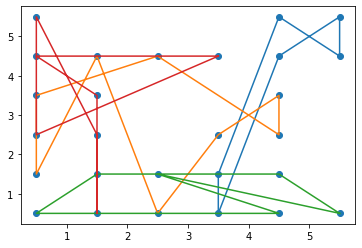

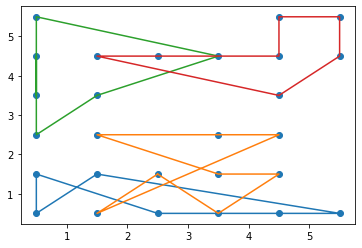

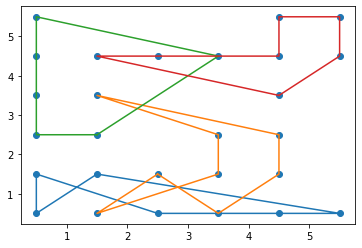

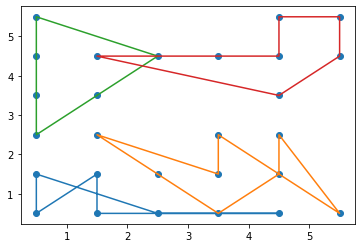

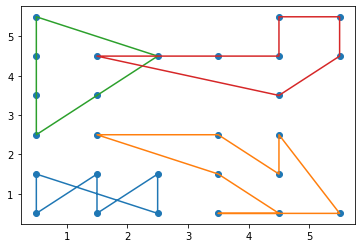

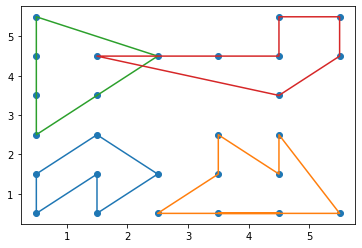

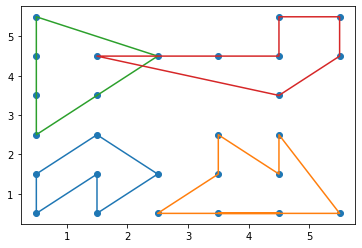

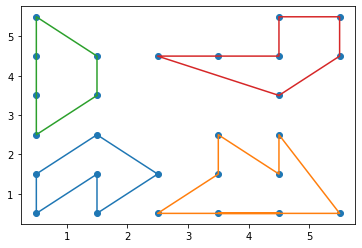

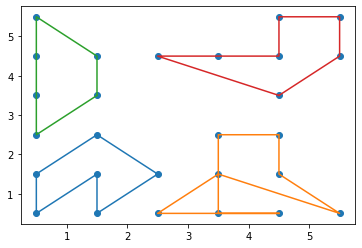

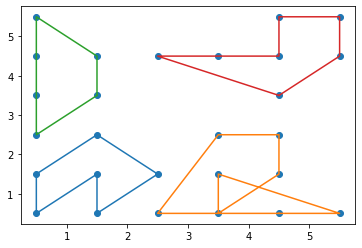

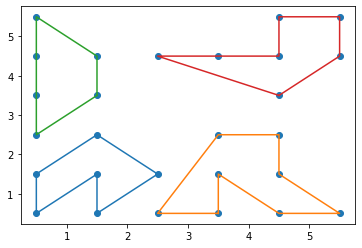

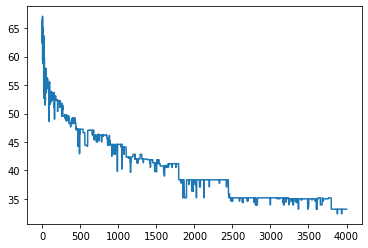

In [240]:
import numpy as np
from matplotlib import pyplot as plt
import math
import copy
import random
#初始化城市
def xy():
    li = []
    for i in range(30):
        x = np.random.randint(10, 4000)
        y = np.random.randint(10, 4000)
        li.append(np.array([x, y]))
    li = np.array(li)
    # return np.array(
    #     [[100, 200], [234, 1245], [423, 124], [123, 974], [578, 294], [1000, 500], [492, 2100], [320, 418], [836, 914]])
    return li

#计算城市间距离矩阵
def D(location1, location2):
    return math.sqrt(pow(location1[0] - location2[0], 2) + pow(location1[1] - location2[1], 2))
    
def DMAT(locations):
    length = len(locations)
    distance = np.ones([length, length])
    # print(distance.shape)
    for i in range(length):
        for j in range(length):
            distance[i, j] = D(locations[i], locations[j])
    return distance

#初始化种群
def init_population(length, num):
    li = list(range(length))
    print(li)
    population = []
    for i in range(num):
        random.shuffle(li)
        population.append(copy.deepcopy(li))
    return population

#适应度计算
def aimFunction(entity, DMAT, break_points):
    """
    目标函数
    :param entity: 个体
    :param DMAT: 距离矩阵
    :param break_points: 切断点
    :return:
    """
    distance = 0
    break_points.insert(0, 0)
    break_points.append(len(entity))
    routes = []
    for i in range(len(break_points) - 1):
        routes.append(entity[break_points[i]:break_points[i + 1]])
    # print(routes)
    for route in routes:
        route.append(route[0])
        for i in range(len(route)-1):
            distance += DMAT[route[i],route[i+1]]

    return 1.0/distance


def fitness(population, DMAT, break_points, aimFunction):
    """
    适应度
    :param population: 种群
    :param DMAT: 距离矩阵
    :param break_points:切断点
    :param aimFunction: 目标函数
    :return:
    """

    value = []
    for i in range(len(population)):
        value.append(aimFunction(population[i], DMAT, copy.deepcopy(break_points)))
        # weed out negative value
        if value[i] < 0:
            value[i] = 0
    return value

#选择（物竞天择）
def selection(population, value):
    # 轮盘赌选择
    fitness_sum = []
    for i in range(len(value)):
        if i == 0:
            fitness_sum.append(value[i])
        else:
            fitness_sum.append(fitness_sum[i - 1] + value[i])

    for i in range(len(fitness_sum)):
        fitness_sum[i] /= sum(value)

    # select new population
    population_new = []
    for i in range(len(value)):
        rand = np.random.uniform(0, 1)
        for j in range(len(value)):
            if j == 0:
                if 0 < rand and rand <= fitness_sum[j]:
                    population_new.append(population[j])

            else:
                if fitness_sum[j - 1] < rand and rand <= fitness_sum[j]:
                    population_new.append(population[j])
    return population_new

#交叉
def amend(entity, low, high):
    """
    修正个体
    :param entity: 个体
    :param low: 交叉点最低处
    :param high: 交叉点最高处
    :return:
    """
    length = len(entity)
    cross_gene = entity[low:high]  # 交叉基因
    not_in_cross = []  # 应交叉基因
    raw = entity[0:low] + entity[high:]  # 非交叉基因


    for i in range(length):
        if not i in cross_gene:
            not_in_cross.append(i)

    error_index = []
    for i in range(len(raw)):
        if raw[i] in not_in_cross:
            not_in_cross.remove(raw[i])
        else:
            error_index.append(i)
    for i in range(len(error_index)):
        raw[error_index[i]] = not_in_cross[i]

    entity = raw[0:low] + cross_gene + raw[low:]

    return entity


def crossover(population_new, pc):
    """
    交叉
    :param population_new: 种群
    :param pc: 交叉概率
    :return:
    """
    half = int(len(population_new) / 2)
    father = population_new[:half]
    mother = population_new[half:]
    np.random.shuffle(father)
    np.random.shuffle(mother)
    offspring = []
    for i in range(half):
        if np.random.uniform(0, 1) <= pc:
            # cut1 = np.random.randint(0, len(population_new[0]))
            # if cut1 >len(father[i]) -5:
            #     cut2 = cut1-5
            # else:
            #     cut2 = cut1+5
            cut1 = 0
            cut2 = np.random.randint(0, len(population_new[0]))
            if cut1 > cut2:
                cut1, cut2 = cut2, cut1
            if cut1 == cut2:
                son = father[i]
                daughter = mother[i]
            else:
                son = father[i][0:cut1] + mother[i][cut1:cut2] + father[i][cut2:]
                son = amend(son, cut1, cut2)
                daughter = mother[i][0:cut1] + father[i][cut1:cut2] + mother[i][cut2:]
                daughter = amend(daughter, cut1, cut2)

        else:
            son = father[i]
            daughter = mother[i]
        offspring.append(son)
        offspring.append(daughter)

    return offspring

#变异
def mutation(offspring, pm):
    for i in range(len(offspring)):
        if np.random.uniform(0, 1) <= pm:
            position1 = np.random.randint(0, len(offspring[i]))
            position2 = np.random.randint(0, len(offspring[i]))
            # print(offspring[i])
            offspring[i][position1],offspring[i][position2] = offspring[i][position2],offspring[i][position1]
            # print(offspring[i])
    return offspring

#主逻辑代码
def show_population(population):
    # x = [i / 100 for i in range(900)]
    x = [i / 100 for i in range(-450, 450)]
    y = [0 for i in range(900)]
    for i in range(900):
        y[i] = aimFunction(x[i])

    population_10 = [decode(p) for p in population]
    y_population = [aimFunction(p) for p in population_10]

    plt.plot(x, y)
    plt.plot(population_10, y_population, 'ro')
    plt.show()


if __name__ == '__main__':

    # x = [i / 100 for i in range(900)]
    # y = [0 for i in range(900)]

    locations = np.stack((x,y), axis=1)
    DMAT = DMAT(locations)
    break_points = [6, 14, 20]
    population = init_population(len(locations), 90)

    t = []
    for i in range(4001):
        # selection
        value = fitness(population, DMAT, break_points, aimFunction)
        population_new = selection(population, value)
        # crossover
        offspring = crossover(population_new, 0.65)
        # mutation
        population = mutation(offspring, 0.02)
        # if i % 1 == 0:
        #     show_population(population)
        result = []
        for j in range(len(population)):
            result.append(1.0 / aimFunction(population[j], DMAT, copy.deepcopy(break_points)))

        t.append(min(result))
        if i % 400 == 0:
            min_entity = population[result.index(min(result))]
            plt.scatter(locations[:, 0], locations[:, 1])

            routes = []
            break_points_plt = copy.deepcopy(break_points)
            break_points_plt.insert(0, 0)
            break_points_plt.append(len(min_entity))
            for i in range(len(break_points_plt) - 1):
                routes.append(min_entity[break_points_plt[i]:break_points_plt[i + 1]])
            for route in routes:
                route.append(route[0])
            for route in routes:
                a = locations[route, 0]
                b = locations[route, 1]
                plt.plot(a, b)

            plt.show()

        # print(min(result))

#     print(t)
    plt.plot(t)
#     plt.axhline(max(y), linewidth=1, color='r')
    plt.show()

# 弓字形矩阵输出

In [213]:
road = []
s = 0
a = np.zeros([n,n])

for i in range(n):
    if i % 2 != 0:
        for j in range(n - 1, -1, -1):
            a[i, j] = s
            s += 1
    else:
        for j in range(n):
            a[i, j] = s
            s += 1
for i in range(n):
    for j in range(n):
        road.append(int(a[i, j]))

In [214]:
road

[0,
 1,
 2,
 3,
 4,
 5,
 11,
 10,
 9,
 8,
 7,
 6,
 12,
 13,
 14,
 15,
 16,
 17,
 23,
 22,
 21,
 20,
 19,
 18,
 24,
 25,
 26,
 27,
 28,
 29,
 35,
 34,
 33,
 32,
 31,
 30]

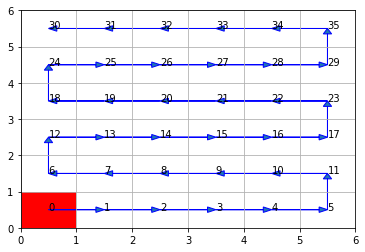

In [217]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
points = np.stack((x,y), axis=1)
num = len(x)
xx = []
yy = []
for i in range(num):
    xx.append(x[road[i]])
    yy.append(y[road[i]])
ax=plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置
ax.fill_between(np.array([0, 1]),0,1,facecolor='red')
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(num - 1):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')
plt.xlim(0, n)
plt.ylim(0, n)

ax.xaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.yaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.xaxis.grid(True,which='major')#major,color='black'
ax.yaxis.grid(True,which='major')#major,color='black'
plt.show()

# 绘图

In [185]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
points = np.stack((x,y), axis=1)
num = len(x)
xx = []
yy = []
for i in range(num + 1):
    xx.append(x[road[i]])
    yy.append(y[road[i]])
ax=plt.subplot(111) #注意:一般都在ax中设置,不再plot中设置
ax.fill_between(np.array([0, 1]),0,1,facecolor='red')
n_x1 = np.array(obstacle_x) - 0.5
n_x2 = np.array(obstacle_x) + 0.5
n_y1 = np.array(obstacle_y) - 0.5
n_y2 = np.array(obstacle_y) + 0.5
for i, p in enumerate(points):
        plt.text(*p, '%d' % i)
for i in range(len(n_x1)):
    ax.fill_between(np.array([n_x1[i], n_x2[i]]), n_y1[i], n_y2[i],facecolor='green')
for i in range(num):
    ax.arrow(xx[i], yy[i], xx[i + 1] - xx[i], yy[i + 1] - yy[i],length_includes_head = True,head_width = 0.15,head_length = 0.15,ec = 'b')
plt.xlim(0, n)
plt.ylim(0, n)

ax.xaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.yaxis.set_major_locator(MultipleLocator(1))#设置y主坐标间隔 1
ax.xaxis.grid(True,which='major')#major,color='black'
ax.yaxis.grid(True,which='major')#major,color='black'
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices